In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
sns.set(style='dark', palette='muted', font_scale=1.1, rc={'figure.figsize': [16, 6]})

In [3]:
# Download Shapefile for NYC boroughs:
# https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm:

# Download Kaggle New York City Airbnb Open Dataset:
# https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

In [4]:
# Load NYC Airbnb Dataset

DATA_ROOT = 'data'

AIRBNB_DIR = 'new-york-city-airbnb-open-data'
AIRBNB_CSV = 'AB_NYC_2019.csv'

NYC_GEO_DIR = 'nyc_geo_data'
NYC_SHAPEFILE = 'geo_export_587f7e9c-ea62-4057-89e4-0f28b638495a.shp'

DATA_AIRBNB = os.path.join(DATA_ROOT, AIRBNB_DIR, AIRBNB_CSV)

In [5]:
df = pd.read_csv(DATA_AIRBNB)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
numeric_columns = df.select_dtypes(include=[np.number]).columns

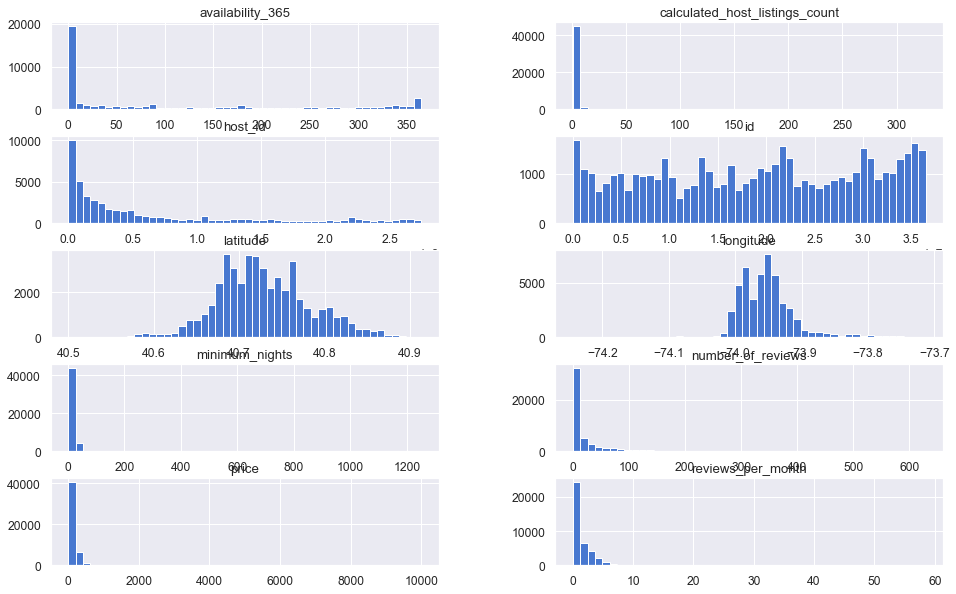

In [9]:
df[numeric_columns].hist(bins=48, figsize=(16, 10), layout=(5, 2));

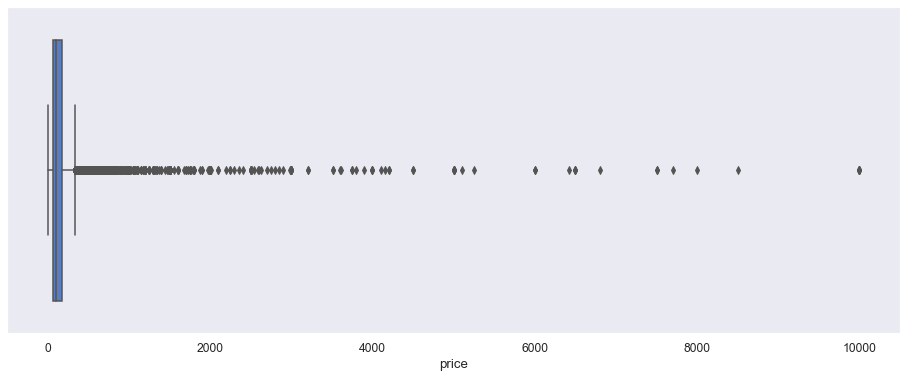

In [10]:
sns.boxplot(x=df['price'])

In [11]:
df['z_score'] = np.abs(stats.zscore(df['price']))

In [12]:
len(df)

48895

In [13]:
indicies = df[df['z_score'] > 0.5 ].index
df.drop(indicies, inplace=True)

In [14]:
len(df)

43286

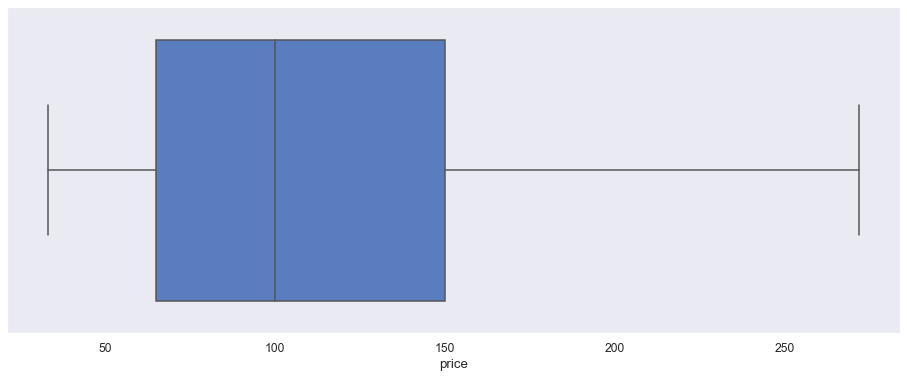

In [15]:
sns.boxplot(x=df['price'])

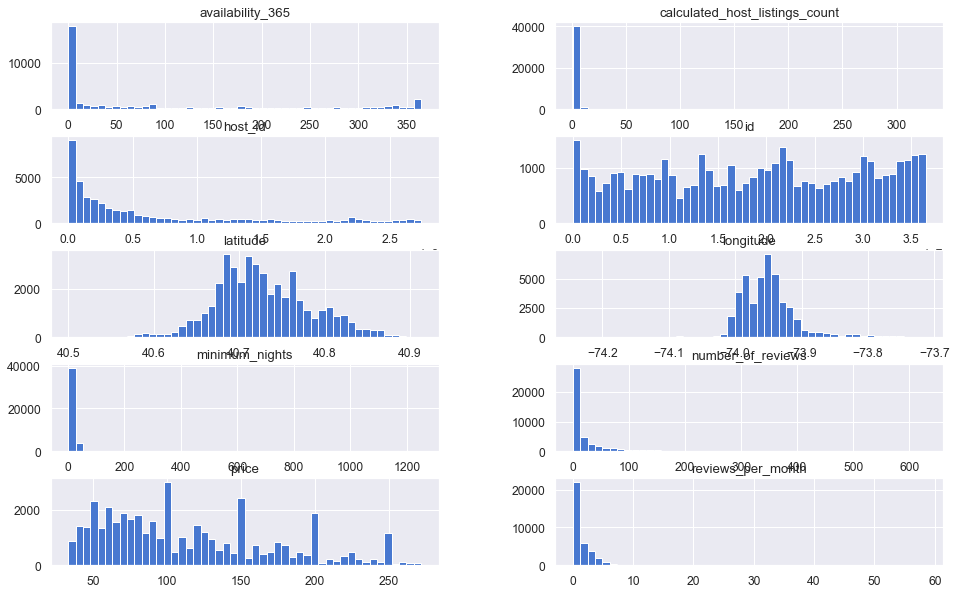

In [16]:
df[numeric_columns].hist(bins=48, figsize=(16, 10), layout=(5, 2));

In [17]:
df_missing = df.isna()
df_missing.sum()

id                                   0
name                                14
host_id                              0
host_name                           19
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       8283
reviews_per_month                 8283
calculated_host_listings_count       0
availability_365                     0
z_score                              0
dtype: int64

In [18]:
df.dropna(subset = ['name', 'host_name', 'last_review', 'reviews_per_month'], inplace=True)

In [19]:
df_missing = df.isna()
df_missing.sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
z_score                           0
dtype: int64

In [20]:
len(df)

34982

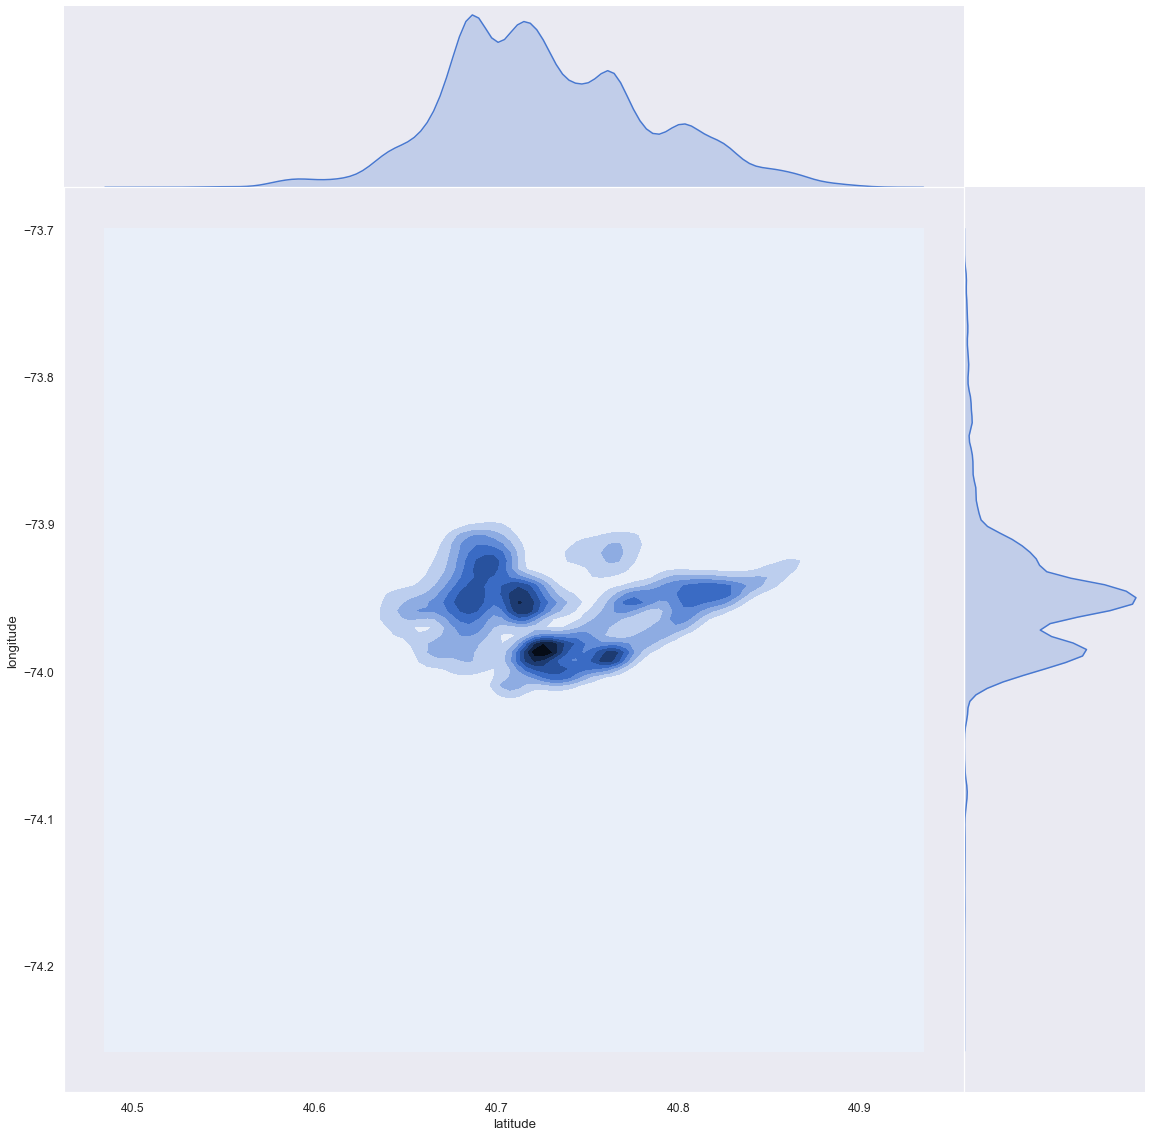

In [21]:
# Joint Plot - Two variables with bivariate and univariate graphs.
x = df['latitude']
y = df['longitude']
joint_plot = sns.jointplot(x, y, kind="kde", height=16, space=0)

In [22]:
string_cols = ['name', 'host_name', 'neighbourhood_group', 'neighbourhood', 'room_type']

for col in string_cols:
    df[col] = df[col].str.lower()

In [23]:
NYC_SHAPEFILE_LOC = os.path.join(DATA_ROOT, NYC_GEO_DIR, NYC_SHAPEFILE)
street_map = gpd.read_file(NYC_SHAPEFILE_LOC)

In [24]:
# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]

# create GeoPandas dataframe
df = gpd.GeoDataFrame(df, geometry = geometry)

In [25]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,z_score,geometry
0,2539,clean & quiet apt home by the park,2787,john,brooklyn,kensington,40.64749,-73.97237,private room,149,1,9,2018-10-19,0.21,6,365,0.015493,POINT (-73.97237 40.64749)
1,2595,skylit midtown castle,2845,jennifer,manhattan,midtown,40.75362,-73.98377,entire home/apt,225,1,45,2019-05-21,0.38,2,355,0.300974,POINT (-73.98377 40.75362)
3,3831,cozy entire floor of brownstone,4869,lisaroxanne,brooklyn,clinton hill,40.68514,-73.95976,entire home/apt,89,1,270,2019-07-05,4.64,1,194,0.265335,POINT (-73.95976 40.68514)
4,5022,entire apt: spacious studio/loft by central park,7192,laura,manhattan,east harlem,40.79851,-73.94399,entire home/apt,80,10,9,2018-11-19,0.10,1,0,0.302811,POINT (-73.94399 40.79851)
5,5099,large cozy 1 br apartment in midtown east,7322,chris,manhattan,murray hill,40.74767,-73.97500,entire home/apt,200,3,74,2019-06-22,0.59,1,129,0.196873,POINT (-73.97500 40.74767)


In [26]:
from sklearn.preprocessing import LabelEncoder

neighb_group_encoder = LabelEncoder()
neighb_encoder = LabelEncoder()
room_type_encoder = LabelEncoder()

df.neighbourhood_group = neighb_group_encoder.fit_transform(df.neighbourhood_group)
df.neighbourhood = neighb_encoder.fit_transform(df.neighbourhood)
df.room_type = room_type_encoder.fit_transform(df.neighbourhood)

AttributeError: 'GeoDataFrame' object has no attribute 'neighborhood'

In [ ]:
df.last_review =  pd.to_datetime(df.last_review, format='%Y-%M-%d')

In [ ]:
df.info()

In [ ]:
df.head(30)

In [ ]:
# Exploratory Data Analysis (EDA)

In [ ]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(16, 16))
# add .shp mapfile to axes
street_map.plot(ax=ax, alpha=0.4, color='grey')

geo_df['airbnb_price'] = df['price']

# add geodataframe to axes
# assign ‘price’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df.plot(column='airbnb_price', ax=ax, alpha=0.4, legend=True, markersize=5, cmap='gist_heat')

# add title to graph
plt.title('airbnb Prices in NYC', fontsize=15)

# set latitiude and longitude boundaries for map display
plt.xlim(-74.03,-73.9)
plt.ylim( 40.68,40.81)

# show map
plt.show()